In [1]:
import matplotlib.pyplot as plt
import multiprocessing   as mp
import numpy as np
import gym
import Portfolio_Gym
from A2C_tf import Actor_Critic

In [2]:
Retrain_Frequency = 100
Sigma_Range       = [2, 0.05]
Sigma_Anneal      = 0.7

Gamma  = 1

AC_Hypers   = {"Learning Rate" : 0.001,
              "Epoch"         : 20,
              "Network Size"  : [32, 16],
              "Activation"    : "Sigmoid",
              "solver"        : 'Adam',
              "Alpha_A"       : 0.01,
              "Alpha_V"       : 0.1}


Env = gym.make('Historical_Monthly-v0')
Env.Set_Params(Risk_Aversion = 1.2,   Episode_Length = 60,   Max_Leverage  = 750,
               Min_Leverage = -750, Validation_Frac = 0.3, Intermediate_Reward = False)

myAC = Actor_Critic(Env, AC_Hypers, Gamma, Sigma_Range, Sigma_Anneal, Retrain_Frequency)

C:\Users\Hli\Anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


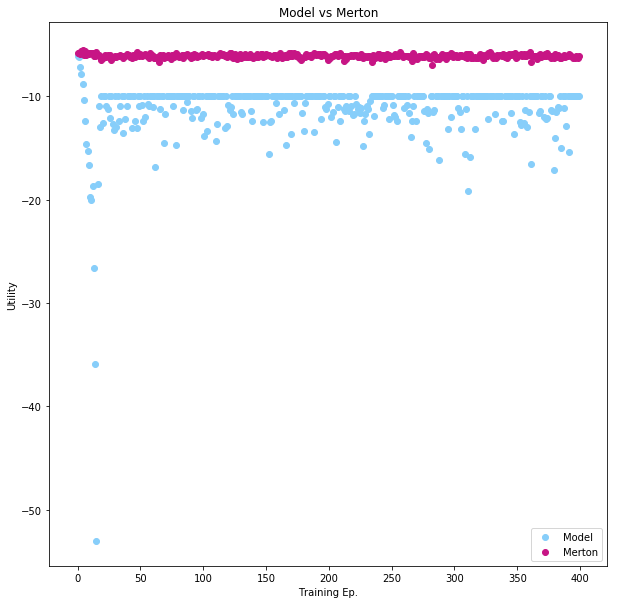

In [3]:
Another = 400
Model_Scores, Merton_Scores = myAC.Train(Another)
f, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.arange(len(Model_Scores)), Model_Scores, label = 'Model', color = 'lightskyblue')
ax.scatter(np.arange(len(Model_Scores)), Merton_Scores, label = 'Merton', color = 'mediumvioletred')
ax.set_title('Model vs Merton')
ax.set_ylabel("Utility")
ax.set_xlabel("Training Ep.")
ax.legend()
plt.show()

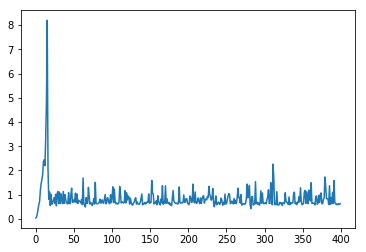

In [ ]:
plt.plot([Model_Scores[i]/Merton_Scores[i] - 1 for i in range(len(Model_Scores))])

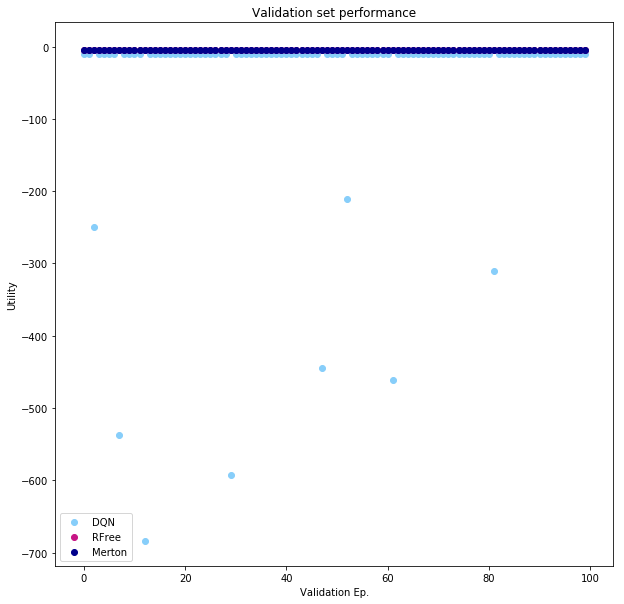

In [ ]:
Results = Env.Validate(100, myAC)

f, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.arange(len(Results[0])), Results[0], label = 'DQN', color = 'lightskyblue')
ax.scatter(np.arange(len(Results[1])), Results[1], label = 'RFree', color = 'mediumvioletred')
ax.scatter(np.arange(len(Results[2])), Results[2], label = 'Merton', color = 'darkblue')

ax.set_title('Validation set performance')
ax.set_ylabel("Utility")
ax.set_xlabel("Validation Ep.")
ax.legend()
plt.show()


In [ ]:
Retrain_Frequency = 100
Sigma_Range       = [2, 0.05]
Sigma_Anneal      = 0.7

Gamma  = 1

AC_Hypers   = {"Learning Rate" : 0.001,
              "Epoch"         : 20,
              "Network Size"  : [32, 16],
              "Activation"    : "Sigmoid",
              "solver"        : 'Adam',
              "Alpha_A"       : 0.01,
              "Alpha_V"       : 0.1}


Env_Daily = gym.make('Historical_Daily-v0')
Env_Daily.Set_Params(Risk_Aversion = 1.2,   Episode_Length = 60,   Max_Leverage  = 750,
               Min_Leverage = -750, Validation_Frac = 0.3, Intermediate_Reward = False)

myAC_daily = Actor_Critic(Env_Daily, AC_Hypers, Gamma, Sigma_Range, Sigma_Anneal, Retrain_Frequency)

C:\Users\Hli\Anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [ ]:
Another = 400
Model_Scores, Merton_Scores = myAC_daily.Train(Another)
f, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.arange(len(Model_Scores)), Model_Scores, label = 'Model', color = 'lightskyblue')
ax.scatter(np.arange(len(Model_Scores)), Merton_Scores, label = 'Merton', color = 'mediumvioletred')
ax.set_title('Model vs Merton')
ax.set_ylabel("Utility")
ax.set_xlabel("Training Ep.")
ax.legend()
plt.show()

In [ ]:
plt.plot([Model_Scores[i]/Merton_Scores[i] -1 for i in range(len(Model_Scores))])

In [ ]:
Results = Env_Daily.Validate(100, myAC_daily)

f, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.arange(len(Results[0])), Results[0], label = 'DQN', color = 'lightskyblue')
ax.scatter(np.arange(len(Results[1])), Results[1], label = 'RFree', color = 'mediumvioletred')
ax.scatter(np.arange(len(Results[2])), Results[2], label = 'Merton', color = 'darkblue')

ax.set_title('Validation set performance')
ax.set_ylabel("Utility")
ax.set_xlabel("Validation Ep.")
ax.legend()
plt.show()
